---
# **Project** : **Object Detection in image and video**
---
### ---> **Sahil Kumar 777**

This project performs object detection in real time using mediapipe framework. The output can be can be used in various applications like to identify objects and locate objects or count number of objects in the scene.

* **Objective :-**Detect multiple objects and draw bounding box
* **Modules :-** openCV, Mediapipe


## Install Important Libraries

In [ ]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have prot

## Functions to visualize results

### Object Bounding box Visualization function for images

In [ ]:
import numpy as np
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import matplotlib.pyplot as plt


MARGIN = 10  # pixels
ROW_SIZE = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
TEXT_COLOR = (255, 0, 0)  # red


def visualize_result(
    image,
    detection_result
) -> np.ndarray:
  """Draws bounding boxes on the input image and return it.
  Args:
    image: The input RGB image.
    detection_result: The list of all "Detection" entities to be visualize.
  Returns:
    Image with bounding boxes.
  """
  for detection in detection_result.detections:
    # Draw bounding_box
    bbox = detection.bounding_box
    start_point = bbox.origin_x, bbox.origin_y
    end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
    cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)

    # Draw label and score
    category = detection.categories[0]
    category_name = category.category_name
    probability = round(category.score, 2)
    result_text = category_name + ' (' + str(probability) + ')'
    text_location = (MARGIN + bbox.origin_x,
                     MARGIN + ROW_SIZE + bbox.origin_y)
    cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)

  return image

### Generete and Save Video from ImageList

In [ ]:
# Convert To Video

import cv2
import mediapipe as mp

def visualize_video(filename,images) :
  """ Function to generate video from list of images.
      Args:
          filename
          images
      Return :
          It returns filename """

  imagesList = [image for image in images]

  # Define the codec and create a VideoWriter object
  fourcc = cv2.VideoWriter_fourcc(*'VP80')  # Can use other codecs like 'mp4v' (for .mp4 files) but mp4 converted files are not supported by coalb and browsers
  fps = 30  # Frames per second
  height, width, _ = imagesList[0].shape

  # Open VideoWriter
  video_writer =  cv2.VideoWriter(filename, fourcc, fps, (width, height))

  # Display gestures and hand landmarks.
  for image in imagesList:
    annotated_image = image.copy()
    video_writer.write(annotated_image)
  video_writer.release() # Closes VideoWriter
  return filename

### Function to Play Video In Colab

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def play_video_in_colab(filepath) :

  with open(filepath,'rb') as file :
    mp4 = file.read()
    data_url = "data:video/"+ filepath.split('.')[-1] +";base64,"  + b64encode(mp4).decode()

  return HTML("""
    <video src="%s" type="video/webm" width="640" height="480" controls autoplay>
    </video>
  """  % data_url)

## Objects detection in image


In [ ]:
# Load the pre trained model
!wget -q -O efficientdet.tflite -q https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite0/int8/1/efficientdet_lite0.tflite

In [ ]:
import cv2
import mediapipe as mp

# Initializing the recogniser options
BaseOptions = mp.tasks.BaseOptions
ObjectDetector = mp.tasks.vision.ObjectDetector
ObjectDetectorOptions = mp.tasks.vision.ObjectDetectorOptions
VisionRunningMode = mp.tasks.vision.RunningMode

model_path = 'efficientdet.tflite'

options = ObjectDetectorOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    max_results=5,
    score_threshold=0.50,
    running_mode=VisionRunningMode.IMAGE)


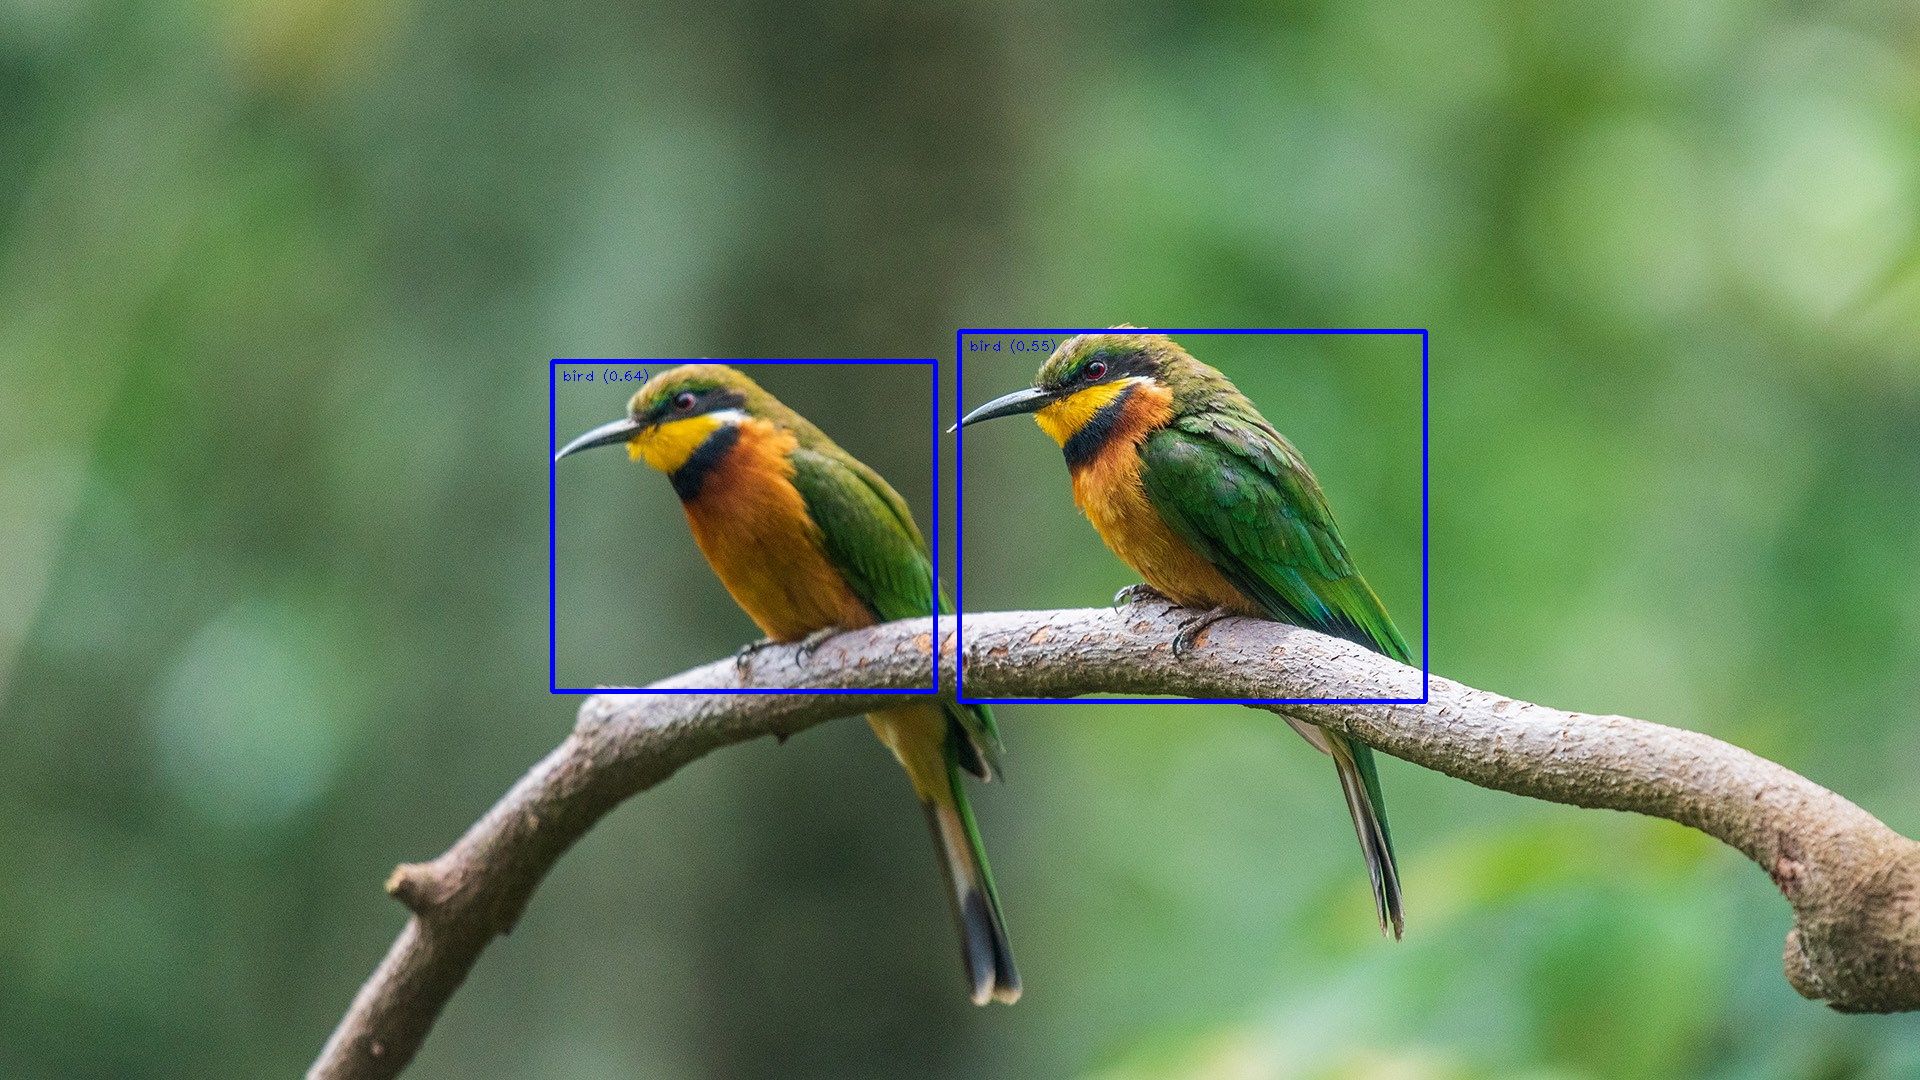

In [ ]:
### Object Detection in image
from google.colab.patches import cv2_imshow

# STEP 1: Initialize the detector
with ObjectDetector.create_from_options(options) as detector:

  image = mp.Image.create_from_file("birds.jpg") # Returns SRGBA format image

  mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image.numpy_view())

  # STEP 4: Recognize gestures in the input image.
  detection_result = detector.detect(image)

  # STEP 5: Process the result. In this case, visualize it.
  n = cv2.cvtColor(image.numpy_view(), cv2.COLOR_RGBA2BGR)
  annotated_image = visualize_result(n, detection_result)
  # cv2_imshow(annotated_image)
  cv2_imshow(annotated_image)

In [ ]:
detection_result

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.7271009087562561, y=0.15094459056854248, z=-0.9061760306358337, visibility=0.9998743534088135, presence=0.9997814297676086), NormalizedLandmark(x=0.7541579604148865, y=0.1337873339653015, z=-0.81199711561203, visibility=0.9994893074035645, presence=0.9989826083183289), NormalizedLandmark(x=0.7742123007774353, y=0.1373530626296997, z=-0.8129613399505615, visibility=0.9994187355041504, presence=0.9989926218986511), NormalizedLandmark(x=0.7921054363250732, y=0.14022085070610046, z=-0.8131718635559082, visibility=0.9995090961456299, presence=0.9986326098442078), NormalizedLandmark(x=0.6951894164085388, y=0.12366974353790283, z=-0.8348045349121094, visibility=0.9997572302818298, presence=0.9988946318626404), NormalizedLandmark(x=0.6747527122497559, y=0.12157988548278809, z=-0.8360230326652527, visibility=0.999815046787262, presence=0.9991028308868408), NormalizedLandmark(x=0.6521186828613281, y=0.12055313587188721, z=-0.8368375897

## Object detection in video


In [ ]:
# Load the pre trained model
!wget -q -O efficientdet.tflite -q https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite0/int8/1/efficientdet_lite0.tflite

In [ ]:
import cv2
import mediapipe as mp

# Initializing the recogniser options
BaseOptions = mp.tasks.BaseOptions
ObjectDetector = mp.tasks.vision.ObjectDetector
ObjectDetectorOptions = mp.tasks.vision.ObjectDetectorOptions
VisionRunningMode = mp.tasks.vision.RunningMode

model_path = 'efficientdet.tflite'

options = ObjectDetectorOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    max_results=5,
    score_threshold=0.50,
    running_mode=VisionRunningMode.VIDEO)

In [ ]:
### Pose Landmarks Detection

# STEP 1: Initialize the detector
with ObjectDetector.create_from_options(options) as detector:

  # STEP 2: Intialize the video capturing into frames
  cap = cv2.VideoCapture('pets.mp4')
  fps = cap.get(cv2.CAP_PROP_FPS)
  images=[]
  results=[]
  i=0

  while cap.isOpened():

    # STEP 3: Read the frames one by one
    success,frame = cap.read();

    if not success :
      if i==0:
        print('Empty frame')
      else :
        print('Detection Completed')
        print('Total Frames : ',i)
      break

    if i ==331 :
      break

    frame_timestamp_ms = int(cap.get(cv2.CAP_PROP_POS_MSEC)) # Get timestamp of the frame
    # frame = cv2.flip(frame, 1) # flip the frame

    # Convert the frame received from OpenCV to a MediaPipe’s Image object.
    mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)

    # STEP 4: Recognize gestures in the input image.
    detection_result = detector.detect_for_video(mp_image,frame_timestamp_ms)

    # STEP 5: Process the result. In this case, visualize it.
    # n = cv2.cvtColor(image.numpy_view(), cv2.COLOR_RGBA2BGR)
    annotated_image = visualize_result(frame, detection_result)

    images.append(annotated_image)

    i+=1

  cap.release()


In [ ]:
visualize_video('OutputVideo1.webm',images)

'OutputVideo1.webm'

In [ ]:
play_video_in_colab('OutputVideo1.webm')